In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import re
import matplotlib.pyplot as plt
from datetime import datetime
from functools import reduce
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Gather

In [2]:
# load the twitter-archive-enhanced.csv into a DataFrame
tw_archive= pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
 url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name=url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name,'wb') as f:
        f.write(response.content)

In [4]:
# Showing the data in the image predictions file
im_predictions=pd.read_csv('image-predictions.tsv',sep='\t')

In [ ]:
 # Twitter API data
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
df_list=list()
with open('tweet_json.txt','r') as file:
    for line in file:
        tweet=json.loads(line)
        tweet_id=tweet['id']
        retweet_count=tweet['retweet_count']
        favorite_count=tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})
api_df=pd.DataFrame(df_list)

api_df.head(5)

favorite_count  retweet_count            tweet_id
0           39467           8853  892420643555336193
1           33819           6514  892177421306343426
2           25461           4328  891815181378084864
3           42908           8964  891689557279858688
4           41048           9774  891327558926688256

Assess

In [7]:
tw_archive.head(30)


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   892420643555336193                    NaN                  NaN   
1   892177421306343426                    NaN                  NaN   
2   891815181378084864                    NaN                  NaN   
3   891689557279858688                    NaN                  NaN   
4   891327558926688256                    NaN                  NaN   
5   891087950875897856                    NaN                  NaN   
6   890971913173991426                    NaN                  NaN   
7   890729181411237888                    NaN                  NaN   
8   890609185150312448                    NaN                  NaN   
9   890240255349198849                    NaN                  NaN   
10  890006608113172480                    NaN                  NaN   
11  889880896479866881                    NaN                  NaN   
12  889665388333682689                    NaN                  NaN   
13  889638837579907072                    NaN                  NaN   
14  889531135344209921                    NaN                  NaN   
15  889278841981685760                    NaN                  NaN   
16  888917238123831296                    NaN                  NaN   
17  888804989199671297                    NaN                  NaN   
18  888554962724278272                    NaN                  NaN   
19  888202515573088257                    NaN                  NaN   
20  888078434458587136                    NaN                  NaN   
21  887705289381826560                    NaN                  NaN   
22  887517139158093824                    NaN                  NaN   
23  887473957103951883                    NaN                  NaN   
24  887343217045368832                    NaN                  NaN   
25  887101392804085760                    NaN                  NaN   
26  886983233522544640                    NaN                  NaN   
27  886736880519319552                    NaN                  NaN   
28  886680336477933568                    NaN                  NaN   
29  886366144734445568                    NaN                  NaN   

                    timestamp  \
0   2017-08-01 16:23:56 +0000   
1   2017-08-01 00:17:27 +0000   
2   2017-07-31 00:18:03 +0000   
3   2017-07-30 15:58:51 +0000   
4   2017-07-29 16:00:24 +0000   
5   2017-07-29 00:08:17 +0000   
6   2017-07-28 16:27:12 +0000   
7   2017-07-28 00:22:40 +0000   
8   2017-07-27 16:25:51 +0000   
9   2017-07-26 15:59:51 +0000   
10  2017-07-26 00:31:25 +0000   
11  2017-07-25 16:11:53 +0000   
12  2017-07-25 01:55:32 +0000   
13  2017-07-25 00:10:02 +0000   
14  2017-07-24 17:02:04 +0000   
15  2017-07-24 00:19:32 +0000   
16  2017-07-23 00:22:39 +0000   
17  2017-07-22 16:56:37 +0000   
18  2017-07-22 00:23:06 +0000   
19  2017-07-21 01:02:36 +0000   
20  2017-07-20 16:49:33 +0000   
21  2017-07-19 16:06:48 +0000   
22  2017-07-19 03:39:09 +0000   
23  2017-07-19 00:47:34 +0000   
24  2017-07-18 16:08:03 +0000   
25  2017-07-18 00:07:08 +0000   
26  2017-07-17 16:17:36 +0000   
27  2017-07-16 23:58:41 +0000   
28  2017-07-16 20:14:00 +0000   
29  2017-07-15 23:25:31 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://t

In [8]:
tw_archive.sample(3)


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2181  668994913074286592                    NaN                  NaN   
997   748324050481647620                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   

                      timestamp  \
2181  2015-11-24 03:29:51 +0000   
997   2016-06-30 01:15:31 +0000   
7     2017-07-28 00:22:40 +0000   

                                                 source  \
2181  <a href="http://twitter.com/download/iphone" r...   
997   <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2181  Two gorgeous pups here. Both have cute fake ho...                  NaN   
997   This is Duke. He permanently looks like he jus...                  NaN   
7     When you watch your owner call another dog a g...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2181                       NaN                        NaN   
997                        NaN                        NaN   
7                          NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2181  https://twitter.com/dog_rates/status/668994913...                 5   
997   https://twitter.com/dog_rates/status/748324050...                11   
7     https://twitter.com/dog_rates/status/890729181...                13   

      rating_denominator  name doggo floofer pupper puppo  
2181                  10  None  None    None   None  None  
997                   10  Duke  None    None   None  None  
7                     10  None  None    None   None  None

In [9]:
tw_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
tw_archive['tweet_id'].value_counts()


749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [11]:
tw_archive['source'].value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
tw_archive['text'].value_counts()


This is Cedrick. He's a spookster. Did me a discomfort. 10/10 would pet with a purpose https://t.co/yS7T4gxKod                                                        1
This is Charles. He's a Nova Scotian Towel Pouncer. Deadly af. Nifty tongue slip. 11/10 would pet with caution https://t.co/EfejX3iRGr                                1
This is Tucker. He would like a hug. 13/10 someone hug him https://t.co/wdgY9oHPrT                                                                                    1
This is Craig. That's actually a normal sized fence he's stuck on. H*ckin massive pupper. 11/10 someone help him https://t.co/aAUXzoxaBy                              1
Say hello to Crimson. He's a Speckled Winnebago. Main passions are air hockey &amp; parkour. 11/10 would pet thoroughly https://t.co/J5aI7SjzDc                       1
Here is a mother dog caring for her pups. Snazzy red mohawk. Doesn't wag tail. Pups look confused. Overall 4/10 https://t.co/YOHe6lf09m                         

In [13]:
tw_archive['retweeted_status_id'].value_counts()


7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [14]:
tw_archive['retweeted_status_user_id'].value_counts()


4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [15]:
tw_archive['retweeted_status_timestamp'].value_counts()


2016-05-19 01:38:16 +0000    1
2016-09-11 21:34:30 +0000    1
2016-08-01 01:28:46 +0000    1
2016-01-27 18:42:06 +0000    1
2016-06-05 19:47:03 +0000    1
2017-04-20 18:14:33 +0000    1
2016-07-13 01:34:21 +0000    1
2016-04-29 00:21:01 +0000    1
2015-12-29 04:31:49 +0000    1
2017-01-07 20:18:46 +0000    1
2017-06-09 16:22:42 +0000    1
2017-02-16 23:23:38 +0000    1
2017-04-01 21:42:03 +0000    1
2017-06-23 01:10:23 +0000    1
2017-02-17 03:39:51 +0000    1
2016-06-07 00:36:02 +0000    1
2016-12-17 00:38:52 +0000    1
2017-04-24 02:13:14 +0000    1
2016-06-08 22:48:46 +0000    1
2016-01-03 05:11:12 +0000    1
2016-06-10 00:39:48 +0000    1
2017-03-08 01:41:24 +0000    1
2017-07-15 02:44:07 +0000    1
2016-07-06 15:54:42 +0000    1
2017-03-04 00:21:08 +0000    1
2015-12-23 00:45:35 +0000    1
2016-08-11 20:40:41 +0000    1
2017-05-05 18:36:06 +0000    1
2016-02-21 01:19:47 +0000    1
2016-09-29 16:03:01 +0000    1
                            ..
2017-01-13 17:00:21 +0000    1
2016-09-

In [16]:
tw_archive['expanded_urls'].value_counts()


https://twitter.com/dog_rates/status/817827839487737858/video/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/759923798737051648/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/773308824254029826/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rat

In [17]:
tw_archive['rating_numerator'].value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
tw_archive['rating_denominator'].value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
tw_archive['name'].value_counts()


None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
the             8
Sadie           8
an              7
Bailey          7
Toby            7
Daisy           7
Buddy           7
Bella           6
Jax             6
Koda            6
Oscar           6
Scout           6
Jack            6
Leo             6
Stanley         6
Dave            6
Milo            6
Rusty           6
Louis           5
             ... 
Willem          1
incredibly      1
Pavlov          1
Hermione        1
Jackie          1
Malikai         1
Billl           1
Monty           1
Gordon          1
Obi             1
Ralphé          1
Clarkus         1
Fiji            1
Kara            1
Georgie         1
Taco            1
BeBe            1
Rooney          1
Anthony         1
Jareld          1
Spanky          1
Mack            1
Ralf            1
Tito            1
Noah      

In [20]:
tw_archive['doggo'].value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
tw_archive['floofer'].value_counts()


None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
tw_archive['pupper'].value_counts()


None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
tw_archive['puppo'].value_counts()


None     2326
puppo      30
Name: puppo, dtype: int64

In [24]:
tw_archive.loc[tw_archive['name'].str.isupper()]


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
775   776201521193218049                    NaN                  NaN   
2041  671542985629241344                    NaN                  NaN   

                      timestamp  \
775   2016-09-14 23:30:38 +0000   
2041  2015-12-01 04:14:59 +0000   

                                                 source  \
775   <a href="http://twitter.com/download/iphone" r...   
2041  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
775   This is O'Malley. That is how he sleeps. Doesn...                  NaN   
2041  This is JD (stands for "just dog"). He's like ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
775                        NaN                        NaN   
2041                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
775   https://twitter.com/dog_rates/status/776201521...                10   
2041  https://twitter.com/dog_rates/status/671542985...                10   

      rating_denominator name doggo floofer pupper puppo  
775                   10    O  None    None   None  None  
2041                  10   JD  None    None   None  None

In [25]:
api_df.sample(5)


favorite_count  retweet_count            tweet_id
9              32467           7711  890240255349198849
668                0           4190  790227638568808452
882             6334           2079  760190180481531904
485             9629           2156  814530161257443328
1384            2887            915  700518061187723268

In [26]:
api_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [27]:
api_df['tweet_id'].value_counts()


749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
720775346191278080    1
879492040517615616    1
785927819176054784    1
834209720923721728    1
857062103051644929    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
678800283649069056    1
6815798356684554

In [28]:
api_df['favorite_count'].value_counts()


0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [29]:
api_df['retweet_count'].value_counts()


1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [30]:
im_predictions.sample(5)


tweet_id                                          jpg_url  \
494  675710890956750848  https://pbs.twimg.com/media/CWCbd8ZWoAAtqoH.jpg   
424  674063288070742018  https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg   
845  695095422348574720  https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg   
543  677269281705472000  https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg   
861  697242256848379904  https://pbs.twimg.com/media/Ca0aIR9WcAAHiPy.jpg   

     img_num                  p1   p1_conf  p1_dog                   p2  \
494        2  standard_schnauzer  0.441427    True  miniature_schnauzer   
424        1             ostrich  0.661176   False             bearskin   
845        1            papillon  0.227784    True            Chihuahua   
543        1   Shetland_sheepdog  0.656616    True               collie   
861        1            grey_fox  0.236031   False          Siamese_cat   

      p2_conf  p2_dog                p3   p3_conf  p3_dog  
494  0.248885    True  Sealyham_terrier  0.164967    True  
424  0.214879   False              swab  0.064456   False  
845  0.218128    True     Border_collie  0.093457    True  
543  0.195405    True   German_shepherd  0.013103    True  
861  0.165791   False        Eskimo_dog  0.063533    True

In [31]:
im_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
im_predictions['tweet_id'].value_counts()


685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [33]:
im_predictions['jpg_url'].value_counts()


https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                                            2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                       

In [34]:
im_predictions['img_num'].value_counts()


1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [35]:
im_predictions['p1'].value_counts()


golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
teddy                         18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [36]:
im_predictions['p1_conf'].value_counts()


0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [37]:
im_predictions['p1_dog'].value_counts()


True     1532
False     543
Name: p1_dog, dtype: int64

In [38]:
im_predictions['p2'].value_counts()


Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
chow                               20
malinois                           20
toy_terrier                        20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [39]:
im_predictions['p2_conf'].value_counts()


0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
0.197021    2
0.347609    2
0.151047    2
0.052724    2
0.153126    2
0.119256    2
0.227150    2
0.057091    2
0.149950    2
0.025119    2
0.165930    2
0.190503    2
0.012763    2
0.181351    2
0.325106    2
0.020089    2
0.172844    2
0.142204    2
0.152445    2
0.052956    2
0.099984    2
0.093940    2
0.252706    2
0.140798    2
0.130611    2
           ..
0.083513    1
0.100988    1
0.038062    1
0.317368    1
0.256433    1
0.057883    1
0.098354    1
0.250014    1
0.088474    1
0.178088    1
0.053008    1
0.052396    1
0.165655    1
0.182538    1
0.074962    1
0.120530    1
0.169758    1
0.119745    1
0.090938    1
0.071665    1
0.139346    1
0.036575    1
0.073101    1
0.118181    1
0.000077    1
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [40]:
im_predictions['p2_dog'].value_counts()


True     1553
False     522
Name: p2_dog, dtype: int64

In [41]:
im_predictions['p3'].value_counts()


Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

In [42]:
im_predictions['p3_conf'].value_counts()


0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
0.077130    2
0.116806    2
0.146427    2
0.003956    2
0.039012    2
0.137186    2
0.109677    2
0.096435    2
0.157028    2
0.157524    2
0.118199    2
0.016497    2
0.100842    2
0.151024    2
0.005410    2
0.026364    2
0.186789    2
0.223263    2
0.087355    2
0.121523    2
0.041476    2
0.071436    2
0.046403    2
0.014858    2
0.003330    2
           ..
0.098207    1
0.013206    1
0.106014    1
0.044002    1
0.127037    1
0.001404    1
0.001274    1
0.008451    1
0.039808    1
0.056548    1
0.001310    1
0.016663    1
0.079883    1
0.122701    1
0.047397    1
0.068297    1
0.031673    1
0.047601    1
0.019516    1
0.051835    1
0.078720    1
0.143328    1
0.000436    1
0.003383    1
0.109454    1
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [43]:
im_predictions['p3_dog'].value_counts()


True     1499
False     576
Name: p3_dog, dtype: int64

Here we find (Quality Issues) (not all issues will be cleaned)



*tw_archive dataframe

Data contains retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN)


tweet_id is an integer

timestamp and retweeted_status_timestamp are currently of type 'object'

source is in HTML format with a and \a tags surrounding the text

name has values that are the string "None" instead of NaN

Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc. Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old. It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies.

Found an instance of a name being "O" instead of "O'Malley"

doggo, floofer, pupper, and puppo have values that are the string "None" instead of NaN

Upon visual inspection in Excel, there are ratings that are incorrect. I ordered the ratings from low to high and looked at the extremes only for incorrect ratings ,as a result of this, Examples where things may have gone wrong is the use of decimals, or when two instances of numbers separated by a slash are present in 1 text and I assume the first was chosen. Also, there are ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly extracted as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27). There are instances of 1/2 and 50/50 which are not ratings such signifying "half" which have been considered as ratings. Finally, use of 4/20 and 24/7 has been confused as ratings.

For future analysis it could be confusing to interpret unstandardized ratings. It is their gimmick to give dogs a rating of 100% but not all are above 100% so it could be interesting to see what % are below or above 100% and how this changed overtime by calculating a single value for rating.

There are many columns in this dataframe making it hard to read, and some will not be needed for analysis


api_df dataframe

There are 11 missing tweets compared to the tw_archive datagrame (I am assuming they have been deleted)


im_predictions dataframe

There are 2356 tweets in the tw_archive dataframe and 2075 rows in the api_df dataframe. This could mean that there is missing data, or that not all 2356 of the tweets had pictures.

tweet_id is an integer

p1, p2, and p3 contain underscores instead of spaces in the labels



Tidiness Issues


tw_archive dataframe

1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)


api_df dataframe


api_df data should be combined with the tw_archive data since they are information about the same tweet


im_predictions  dataframe

im_predictions data could be combined with the tw_archive data as well since it is all information about 1 tweet



Clean

In [44]:

tw_archive_clean = tw_archive.copy()
api_df_clean = api_df
im_predictions_clean =im_predictions.copy()

Tidiness issue 1 - Merge all dataframes

Define

Issue: api_df and im_predictions data should be combined with the tw_archive data since they are information about the same tweet

Solution: Merge the 3 datasets together on 'tweet_id' using the reduce function.


Code

In [45]:
# Merge the tw_archive, api_df, and im_predictions dataframes on 'tweet_id'
dfs = [tw_archive_clean, api_df, im_predictions]
twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)


Test

In [46]:
# View first few lines of new twitter dataframe to ensure the columns have merged
twitter.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  ...    img_num  \
0  https://twitter.com/dog_rates/status/892420643...  ...          1   
1  https://twitter.com/dog_rates/status/892177421...  ...          1   

          p1   p1_conf p1_dog        p2   p2_conf p2_dog        p3   p3_conf  \
0     orange  0.097049  False     bagel  0.085851  False    banana  0.076110   
1  Chihuahua  0.323581   True  Pekinese  0.090647   True  papillon  0.068957   

  p3_dog  
0  False  
1   True  

[2 rows x 30 columns]

In [47]:
# View info of new twitter dataframe to ensure the columns have merged
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorite_count                2073 

Tidiness issue 2 - One column for dog stages

Define

Issue: 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

Solution: Extract the dog stages from the 'text' column into the new 'dog_stage' column using regular expression then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns. This also takes care of the quality issue of "name has values that are the string "None" instead of NaN".

Code

In [48]:
# Extract dog stages from 'text' column into new 'dog_stage' column 
twitter['dog_stage'] = twitter['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [49]:
# Check that first few instances of dog_stage are similar 
# to that which was previously extracted
twitter[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

dog_stage  doggo floofer pupper  puppo
0        NaN   None    None   None   None
1        NaN   None    None   None   None
2        NaN   None    None   None   None
3        NaN   None    None   None   None
4        NaN   None    None   None   None
5        NaN   None    None   None   None
6        NaN   None    None   None   None
7        NaN   None    None   None   None
8        NaN   None    None   None   None
9      doggo  doggo    None   None   None
10       NaN   None    None   None   None
11       NaN   None    None   None   None
12     puppo   None    None   None  puppo
13       NaN   None    None   None   None
14     puppo   None    None   None  puppo

In [50]:
# Drop doggo, floofer, pupper, and puppo columns
twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


Test

In [51]:
# Check for presence of 'dog_stage" and absence of 'doggo', 'floofer', 
# 'pupper', and 'puppo'
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non

Quality issue 1 - Remove retweets

Define

Issue: Data contains retweets

Solution: Rows where 'retweeted_status_id' is a NaN will be kept (ie. if it has a value it will be removed), then the 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns will be removed

In [52]:
# Keep columns where 'retweeted_status_id' is NaN
twitter = twitter[np.isnan(twitter.retweeted_status_id)]

# Check info to determine all there are no non-null entries for
# 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp'
print(twitter.info())

# Remove 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp' columns
twitter = twitter.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
favorite_count                1994 non-null int64
retweet_count                 1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                            1994 non-nu

Test

In [53]:
# Check info to ensure the 'retweeted_status_id', 'retweeted_status_user_id' 
# and 'retweeted_status_timestamp' columns have been dropped
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   19

Quality issue 2 - tweet_id is an integer
Define
Issue: tweet_id is an integer
Solution: Change tweet_id to a string/object


Code

In [54]:
# Change 'tweet_id' to a string
twitter['tweet_id'] = twitter['tweet_id'].astype(str)

Test

In [55]:
# Check info to confirm tweet_id has been changed from an
# integer to a string/object
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1

Quality issue 3 - 'timestamp' type

Define

Issue: 'timestamp' and 'retweeted_status_timestamp' are currently of type 'object'

Solution: Convert 'timestamp' to a datetime object ('retweeted_status_timestamp' was deleted)



Code

In [56]:
# Remove the time zone information from 'timestamp' column
twitter['timestamp'] = twitter['timestamp'].str.slice(start=0, stop=-6)

In [57]:
# Change the 'timestamp' column to a datetime object
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'], format = "%Y-%m-%d %H:%M:%S")

Test

In [58]:
# Confirm that 'timestamp' column is now a datetime object
twitter.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog            


Quality issue 4/5/6 - Various issues with 'name'


Define
Issue:

name has values that are the string "None" instead of NaN
Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc. Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old. It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies.

I also found an instand of a name being "O" instead of "O'Malley"
Solution: Replace all inaccurate names with NaNs, and the "O" with "O'Malley".


Code

In [59]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [60]:
# Replace all names that start with a lowercase letter with a NaN
twitter['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Replace the name 'O' with "O'Malley" 
twitter['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

Test

In [61]:
# Check value counts to see that None and names starting with 
# a lowercase letter are gone
twitter['name'].value_counts()

Charlie       11
Cooper        10
Oliver        10
Lucy          10
Penny          9
Tucker         9
Winston        8
Sadie          8
Daisy          7
Lola           7
Toby           7
Bo             6
Bella          6
Stanley        6
Jax            6
Koda           6
Leo            5
Louis          5
Rusty          5
Chester        5
Milo           5
Buddy          5
Scout          5
Oscar          5
Bailey         5
Dave           5
Finn           4
Cassie         4
Jerry          4
Reggie         4
              ..
Obi            1
Gordon         1
Monty          1
Billl          1
Reptar         1
Bell           1
BeBe           1
Alexander      1
Leonard        1
Tupawc         1
Emma           1
Vince          1
Tayzie         1
Simba          1
Longfellow     1
Cilantro       1
Lilli          1
Quinn          1
Julius         1
Taco           1
Brownie        1
Tug            1
Lipton         1
Ralph          1
Ralphé         1
Clarkus        1
Fiji           1
Kara          

Quality issue 7 - Inaccurate ratings

Define
Issue: Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).

Solution: Find all instances of ratings that contained decimals and replace the numerator values with the correct values.

Code

In [62]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [63]:
# Print the index of text with decimal ratings
ratings_with_decimals_index

[40, 558, 614, 1451]

In [64]:
# Change contents of 'rating_numerator' based on info found in 
# preceeding 2 cells
twitter.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])


Test

In [65]:
# Check contents of row with index 40 to ensure the rating is corrected
twitter.loc[40]

tweet_id                                                883482846933004288
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                              2017-07-08 00:28:19
source                   <a href="http://twitter.com/download/iphone" r...
text                     This is Bella. She hopes her smile made you sm...
expanded_urls            https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                      13.5
rating_denominator                                                      10
name                                                                 Bella
favorite_count                                                       46860
retweet_count                                                        10407
jpg_url                    https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
img_num                  

Quality issue 8 - Unstandardized ratings


Define
Issue: For future analysis it could be confusing to interpret unstandardized ratings. It is their gimmick to give dogs a rating of 100% but not all are above 100% so it could be interesting to see what % are below or above 100% and how this changed overtime by calculating a single value for rating.
Solution: Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'.


Code

In [66]:
# Calulate the value of 'rating'
twitter['rating'] = twitter['rating_numerator'] / twitter['rating_denominator']


Test

In [67]:

# Check for presence of new column and correct calculation
twitter.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   

   rating_denominator     name   ...     p1_conf  p1_dog     p2   p2_conf  \
0                  10  Phineas   ...    0.097049   False  bagel  0.085851   

  p2_dog      p3  p3_conf p3_dog  dog_stage  rating  
0  False  banana  0.07611  False        NaN     1.3  

[1 rows x 25 columns]


Quality issue 9 - Unnessary columns and text cut off


Define

Issue: There are many columns in this dataframe making it hard to read, and some will not be needed for analysis. In addition some of the text in the table output is cut off.

Solution: Drop undesired columns and change table display settings.

Code

In [68]:
# View all column names
twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage', 'rating'],
      dtype='object')

In [69]:
# Change some column names so they are shorter
twitter.rename(columns={'rating_numerator': 'numerator', 
                        'rating_denominator': 'denominator'}, inplace=True)

# Drop undesired columns to make dataframe easier to view
twitter.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source',
              'img_num'], axis=1, inplace=True)

# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None)


Test

In [70]:
# Confirm that now dataframe contains the desired columns and
# all text is shown for easy viewing
twitter.head(1)

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   

                                       expanded_urls  numerator  denominator  \
0  https://twitter.com/dog_rates/status/892420643...       13.0           10   

      name  favorite_count  retweet_count  \
0  Phineas           39467           8853   

                                           jpg_url      p1   p1_conf  p1_dog  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  orange  0.097049   False   

      p2   p2_conf  p2_dog      p3  p3_conf  p3_dog dog_stage  rating  
0  bagel  0.085851   False  banana  0.07611   False       NaN     1.3

Storing Dataframe



In [71]:
# Save twitter dataframe to a CSV file
twitter.to_csv('twitter_archive_master.csv')


Anayze and Visualize

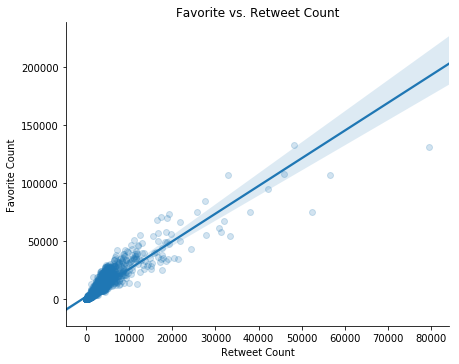

In [72]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Favorite and retweet counts are highly positively correlated. For about every 4 favorites there is 1 retweet. The majority of the data falls below 40000 favorites and 10000 retweets.

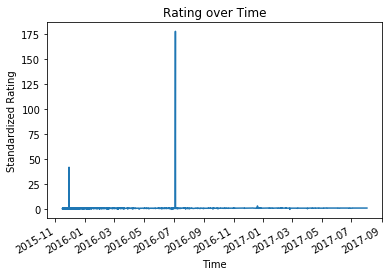

In [73]:

# Plot standardized ratings over time
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

In [74]:
# There are 3 outliers with a rating over 2.  
# Find them to see if they are inaccurate or just unique.
twitter.loc[twitter['rating'] > 2]

tweet_id           timestamp  \
415   810984652412424192 2016-12-19 23:06:23   
802   749981277374128128 2016-07-04 15:00:45   
1795  670842764863651840 2015-11-29 05:52:33   

                                                   text  \
415   Meet Sam. She smiles 24/7 &amp; secretly aspir...   
802   This is Atticus. He's quite simply America af....   
1795  After so many requests... here you go.\n\nGood...   

                                          expanded_urls  numerator  \
415   https://www.gofundme.com/sams-smile,https://tw...       24.0   
802   https://twitter.com/dog_rates/status/749981277...     1776.0   
1795  https://twitter.com/dog_rates/status/670842764...      420.0   

      denominator     name  favorite_count  retweet_count  \
415             7      Sam            5927           1655   
802            10  Atticus            5569           2772   
1795           10      NaN            7989           4324   

                                              jpg_url                p1  \
415   https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg  golden_retriever   
802   https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg           bow_tie   
1795  https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg        microphone   

       p1_conf  p1_dog               p2   p2_conf  p2_dog                  p3  \
415   0.871342    True  Tibetan_mastiff  0.036708    True  Labrador_retriever   
802   0.533941   False       sunglasses  0.080822   False            sunglass   
1795  0.096063   False        accordion  0.094075   False           drumstick   

       p3_conf  p3_dog dog_stage      rating  
415   0.025823    True       NaN    3.428571  
802   0.050776   False       NaN  177.600000  
1795  0.061113   False       NaN   42.000000

The first instance is a rating of 24/7 which is inaccurate and I had found when looking for quality errors but decided not to fix. If we were required to fix all problems then thix tweet could be removed but I will ignore in this case. The other 2 tweets are accurate ratings that are jokes. I am more interested if the tweets with a standardized rating of below 1 decrease over time therefore I will limit the y axis from 0 to 2.

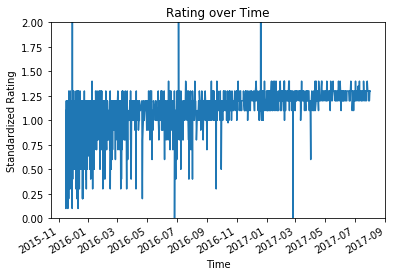

In [75]:
# Plot standardized ratings over time with ylim of 0-2
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

Indeed it appears that overtime the frequency of ratings below 1 decreases. Before 2016-11 there many ratings below 1, while after that time there are barely any.



In [ ]:
-